In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\train_values.csv")
labels = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\train_labels.csv")
test = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\test_values.csv")
print("We have "+str(train.shape[0])+" set of Training data and "+str(test.shape[0])+" set of testing data "+"Totally we Have "+str(train.shape[0]+test.shape[0])+" Dataset...")

We have 260601 set of Training data and 86868 set of testing data Totally we Have 347469 Dataset...


In [3]:
dtype = {'geo_level_1_id': str,
         'geo_level_2_id': str,
         'geo_level_3_id': str}
X = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\train_values.csv",index_col='building_id',dtype=dtype)
y = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\train_labels.csv",index_col='building_id')['damage_grade']
print("We have "+str(train.shape[0])+" set of Training data and "+str(test.shape[0])+" set of testing data "+"Totally we Have "+str(train.shape[0]+test.shape[0])+" Dataset...")

We have 260601 set of Training data and 86868 set of testing data Totally we Have 347469 Dataset...


In [4]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X.foundation_type.value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [6]:
X.filter(like='has_super', axis=1).head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,
802906,1,1,0,0,0,0,0,0,0,0,0
28830,0,1,0,0,0,0,0,0,0,0,0
94947,0,1,0,0,0,0,0,0,0,0,0
590882,0,1,0,0,0,0,1,1,0,0,0
201944,1,0,0,0,0,0,0,0,0,0,0


In [7]:
X.has_superstructure_adobe_mud.value_counts()

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

In [8]:
y = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\train_labels.csv",index_col='building_id')['damage_grade']

## Split Dataset and Create Baseline

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.5697045280122793


## Build Model (Random Forest Classifier)

In [57]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
739427,13,257,8352,3,25,2,5,n,r,n,...,0,0,0,0,0,0,0,0,0,0
17201,6,1076,9202,3,40,10,8,o,r,n,...,0,0,1,0,0,0,0,0,0,0
723805,7,838,10723,2,45,8,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
891512,7,555,2763,2,30,7,4,t,r,n,...,0,0,0,0,0,0,0,0,0,0
484350,17,682,1039,3,30,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208480 entries, 739427 to 246461
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          208480 non-null  object
 1   geo_level_2_id                          208480 non-null  object
 2   geo_level_3_id                          208480 non-null  object
 3   count_floors_pre_eq                     208480 non-null  int64 
 4   age                                     208480 non-null  int64 
 5   area_percentage                         208480 non-null  int64 
 6   height_percentage                       208480 non-null  int64 
 7   land_surface_condition                  208480 non-null  object
 8   foundation_type                         208480 non-null  object
 9   roof_type                               208480 non-null  object
 10  ground_floor_type                       208480 non-

In [59]:
X_train.select_dtypes(include='object').columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [60]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [61]:
cat_cols = ['geo_level_1_id', 'land_surface_condition', 
            'foundation_type', 'roof_type',
            'ground_floor_type', 'other_floor_type', 
            'position', 'plan_configuration', 'legal_ownership_status']

### Creating Model Pipeline

In [62]:
pipeline = make_pipeline(
    OrdinalEncoder(cols=['geo_level_2_id', 'geo_level_3_id']),
    OneHotEncoder(cols=cat_cols),
    RandomForestClassifier()
)

In [63]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['geo_level_2_id', 'geo_level_3_id'],
                                mapping=[{'col': 'geo_level_2_id',
                                          'data_type': dtype('O'),
                                          'mapping': 257        1
1076       2
838        3
555        4
682        5
        ... 
771     1408
1163    1409
1016    1410
361     1411
NaN       -2
Length: 1412, dtype: int64},
                                         {'col': 'geo_level_3_id',
                                          'data_type': dtype('O'),
                                          'mapping': 8352         1
9202         2
10723        3
2763         4
1039         5
         ...  
9515     11355
11049    11356
2433     11357
4959     11358
NaN         -2
Length: 11359, dtype: int64}])),
                ('onehotencoder',
                 OneHotEncoder(cols=['geo_level_1_id', 'land_surface_condition',
                               

In [64]:
pipeline.named_steps['randomforestclassifier']

RandomForestClassifier()

In [66]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
print('Validation F1:', f1_score(y_test, pipeline.predict(X_test), average='micro'))

Validation F1: 0.7183476909499049


In [19]:
cm = confusion_matrix(y_test, pipeline.predict(X_test))
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test, pipeline.predict(X_test)))

Confusion matrix: 
 [[ 2525  2539   106]
 [ 1176 24148  4163]
 [  124  6629 10711]]
Classification report: 
               precision    recall  f1-score   support

           1       0.66      0.49      0.56      5170
           2       0.72      0.82      0.77     29487
           3       0.72      0.61      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.70      0.64      0.66     52121
weighted avg       0.72      0.72      0.71     52121



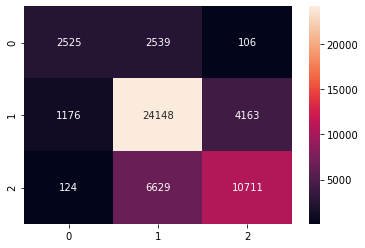

In [20]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [68]:
cleanup_letters = {"land_surface_condition": {"n": 1, "o": 2, "t":3},
                "foundation_type": {"h": 1, "i": 2, "r": 3, "u": 4, "w": 5},               
                "roof_type": {"n": 1, "q": 2, "x": 3},
                "ground_floor_type": {"f": 1, "m": 2, "v": 3, "x": 4, "z": 5},
                "other_floor_type": {"j": 1, "q": 2, "s": 3, "x": 4},
                "position": {"j": 1, "o": 2, "s": 3, "t": 4},
                "plan_configuration": {"a": 1, "c": 2, "d": 3, "f": 4, "m": 5, "n": 6, "o": 7, "q": 8, "s": 9, "u":10},
                "legal_ownership_status": {"a": 1, "r": 2, "v": 3, "w": 4}             
               }
X_train.replace(cleanup_letters, inplace=True)

C:\Users\Dimas AR\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


In [69]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
739427,13,257,8352,3,25,2,5,1,3,1,...,0,0,0,0,0,0,0,0,0,0
17201,6,1076,9202,3,40,10,8,2,3,1,...,0,0,1,0,0,0,0,0,0,0
723805,7,838,10723,2,45,8,5,3,3,1,...,0,0,0,0,0,0,0,0,0,0
891512,7,555,2763,2,30,7,4,3,3,1,...,0,0,0,0,0,0,0,0,0,0
484350,17,682,1039,3,30,6,7,3,3,2,...,0,0,0,0,0,0,0,0,0,0


## Hyperparameter Tuning (RSCV) 

From model above, the model is overfitting caused by low F1 Score on test data but have a high F1 Score on train data. Therefore, we need to tune the model in order to reduce overfitting. I choose RandomizedSearchCV method to tune the model to allow the data itself randomly select the combinations of overall parameters. Furthermore, the dataset is very large so i prefer it a lot rather than GridSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
params = {'n_estimators': range(50, 251, 50),
          'max_depth': range(3, 25),
          'max_features': ['sqrt', 'log2', None]}

rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=params,
                          n_iter=20,
                          cv=3,
                          verbose=-1,
                          n_jobs=8)

model = make_pipeline(
    OrdinalEncoder(cols=['geo_level_2_id', 'geo_level_3_id']),
    OneHotEncoder(cols=cat_cols),
    rscv
)

In [23]:
model.fit(X, y);

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed: 126.0min finished


In [29]:
cm = confusion_matrix(y, model.predict(X))
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y, model.predict(X)))

Confusion matrix: 
 [[ 17487   7544     93]
 [   442 143496   4321]
 [   109  20612  66497]]
Classification report: 
               precision    recall  f1-score   support

           1       0.97      0.70      0.81     25124
           2       0.84      0.97      0.90    148259
           3       0.94      0.76      0.84     87218

    accuracy                           0.87    260601
   macro avg       0.91      0.81      0.85    260601
weighted avg       0.88      0.87      0.87    260601



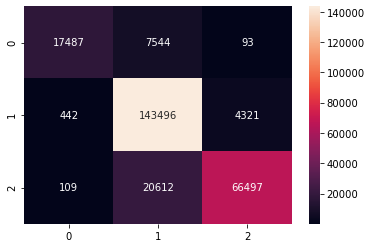

In [30]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [28]:
print('Validation F1:', f1_score(y, model.predict(X), average='micro'))

Validation F1: 0.8729053226963825


In [31]:
rscv.best_params_

{'n_estimators': 200, 'max_features': None, 'max_depth': 23}

 ## Submission

In [38]:
X_test = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\test_values.csv", dtype=dtype, index_col='building_id')

In [40]:
X_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred[:10]

array([2, 2, 2, 1, 3, 2, 1, 3, 2, 2], dtype=int64)

In [43]:
submission = pd.DataFrame({'damage_grade':y_pred}, index=X_test.index)
submission.head()

,damage_grade
building_id,
300051,2
99355,2
890251,2
745817,1
421793,3


Grade1 :5675->6.53290049270157%
Grade2 :57811->66.55039830547497%
Grade3 :23382->26.916701201823457%


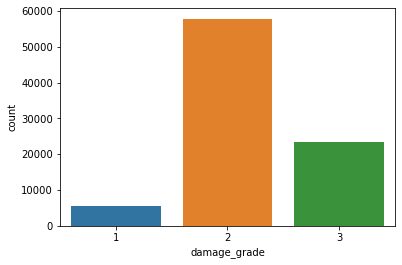

In [44]:
sns.countplot(submission.damage_grade)
print('Grade1 :'+str(sum(submission.damage_grade == 1))+'->'+str(sum(submission.damage_grade == 1)/submission.shape[0]*100)+'%')
print('Grade2 :'+str(sum(submission.damage_grade == 2))+'->'+str(sum(submission.damage_grade == 2)/submission.shape[0]*100)+'%')
print('Grade3 :'+str(sum(submission.damage_grade == 3))+'->'+str(sum(submission.damage_grade == 3)/submission.shape[0]*100)+'%')